# The Normal Equation

## Generating a linear-looking data to test the equation on

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [2]:
from matplotlib import pyplot as plt

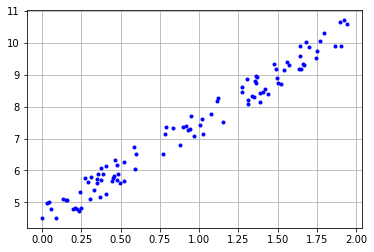

In [3]:
plt.plot(X, y, 'b.')
plt.grid("on")
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.50849755],
       [3.02164782]])

In [6]:
# making some predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.50849755],
       [10.5517932 ]])

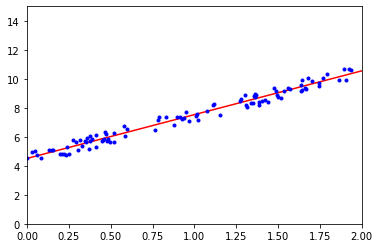

In [7]:
# plotting the predicted values
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
# using sklearn 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.50849755]), array([[3.02164782]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.50849755],
       [10.5517932 ]])

In [10]:
# using scipy's least squares to find theta_best
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.50849755],
       [3.02164782]])

In [11]:
# using the pseudoinverse of X: theta_best = pinv(X_b).y
np.linalg.pinv(X_b).dot(y)

array([[4.50849755],
       [3.02164782]])

# Gradient Descent

## Batch Gradient Descent

In [12]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2, 1)

for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - (eta * gradients)

In [13]:
theta

array([[4.50849755],
       [3.02164782]])

## Stochastic Gradient Descent

In [14]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.rand(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - (eta * gradients)

In [15]:
theta

array([[4.51729069],
       [3.01527203]])

In [16]:
# using sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.49780575]), array([3.03621493]))

# Polynomial Regression

## Generating a non-linear data to start with 

In [18]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

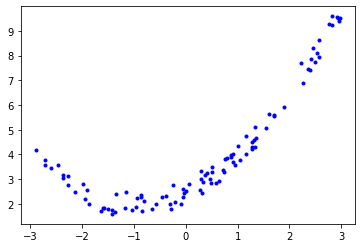

In [19]:
# plotting the generated data
plt.plot(X, y, 'b.')
plt.show()

## Using sklearn's PolynomialFeatures class to fit_transform the data inputs.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[0.30351679]
[0.30351679 0.09212244]


## Fitting a linear model to this extended dataset

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.4548947]), array([[0.97268323, 0.50639461]]))

## Learning Curves

In [22]:
# Function for generating learning curve

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(y_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

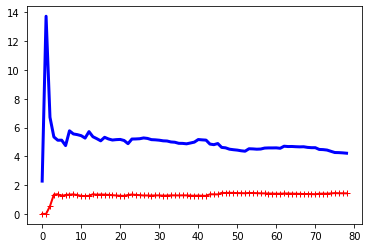

In [23]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

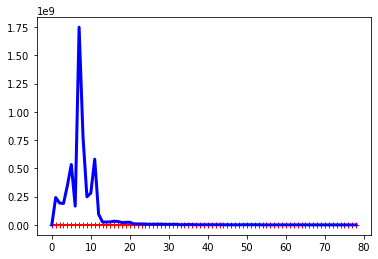

In [24]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

# Regularized linear models

## Ridge Regression
- It is important to scale the data before performing ridge regression as it is sensitive to the scale of the input features

In [25]:
# performing ridge regression with sklearn
# using a variance of the normal equation by Andre-Louis Cholesky
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.44463738]])

In [26]:
# and now, using stochastic gradient descent
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.43418008])

## Lasso Regression (Least Absolute Shrinkage and Selection Operetor Regression)
This one uses l1 norm

In [27]:
# an example with sklearn.
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.40081577])

## Elastic Net: 
The middle ground between the two. With proportions of each regularization term

In [28]:
# example fo elastic net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.39840377])

## Early stopping

In [ ]:
# # basic implemenation of early stopping
# from sklearn.base import clone
# from sklearn.preprocessing import StandardScaler

# # preparing the data
# poly_scaler = Pipeline([
#     ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
#     ("std_scaler", StandardScaler()),
# ])
# X_train_poly_scaled = poly_scaler.fit_transform(X)

# Logistic Regression